<a href="https://colab.research.google.com/github/AbdulKyeopta/Rekomendasi-Buku-Berbahasa-inggris/blob/main/Rekomendasi_buku_berbahasa_Inggris_menggunakan_Collaborative_fingering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Komputasi matematik 
import pandas as pd #load dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books = pd.read_csv('/content/drive/MyDrive/books/Books.csv') # load dataset books
users = pd.read_csv('/content/drive/MyDrive/books/Users.csv') # load dataset users
ratings = pd.read_csv('/content/drive/MyDrive/books/Ratings.csv') # load dataset ratings

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
books.head(5)  #menampilkan bagian pertama dari books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head(7)   #menampilkan bagian pertama dari ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8


In [ ]:
users.head(8)   #menampilkan bagian pertama dari users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN


In [ ]:
books['Image-URL-M'][1]   #menampilkan url dari buku

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [ ]:
combine = [books, ratings, users]     #menggabungkan 3 dataset
data = pd.concat(combine)

In [ ]:
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,NaN,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
278853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278854.0,NaN,"portland, oregon, usa",NaN
278854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278855.0,NaN,"tacoma, washington, united kingdom",50.0
278855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278856.0,NaN,"brampton, ontario, canada",NaN
278856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278857.0,NaN,"knoxville, tennessee, usa",NaN


In [ ]:
data.isnull().any().sum()     #melihat jumlah kolom berisi missing value

12

In [ ]:
feat_list = list(data.columns.values)      #melihat missing value dari tiap-tiap kolom

for feat in feat_list:
  print(feat, ': ',sum(pd.isnull(data[feat])))

ISBN :  278858
Book-Title :  1428638
Book-Author :  1428639
Year-Of-Publication :  1428638
Publisher :  1428640
Image-URL-S :  1428638
Image-URL-M :  1428638
Image-URL-L :  1428641
User-ID :  271360
Book-Rating :  550218
Location :  1421140
Age :  1531902


In [ ]:
data = data.dropna(thresh=2)
print(data)

              ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
278853         NaN                                                NaN   
278854         NaN                                                NaN   
278855         NaN                                                NaN   
278856         NaN                                                NaN   
278857         NaN                                                NaN   

                 Book-Author Year-Of-Publication                   Publisher  \
0         Mark P. O. Morford               

In [ ]:
print(data.shape) #menampilkan bentuk data

(1699998, 12)


In [ ]:
data.duplicated().sum() #menampilkan jumlah data duplikat

0

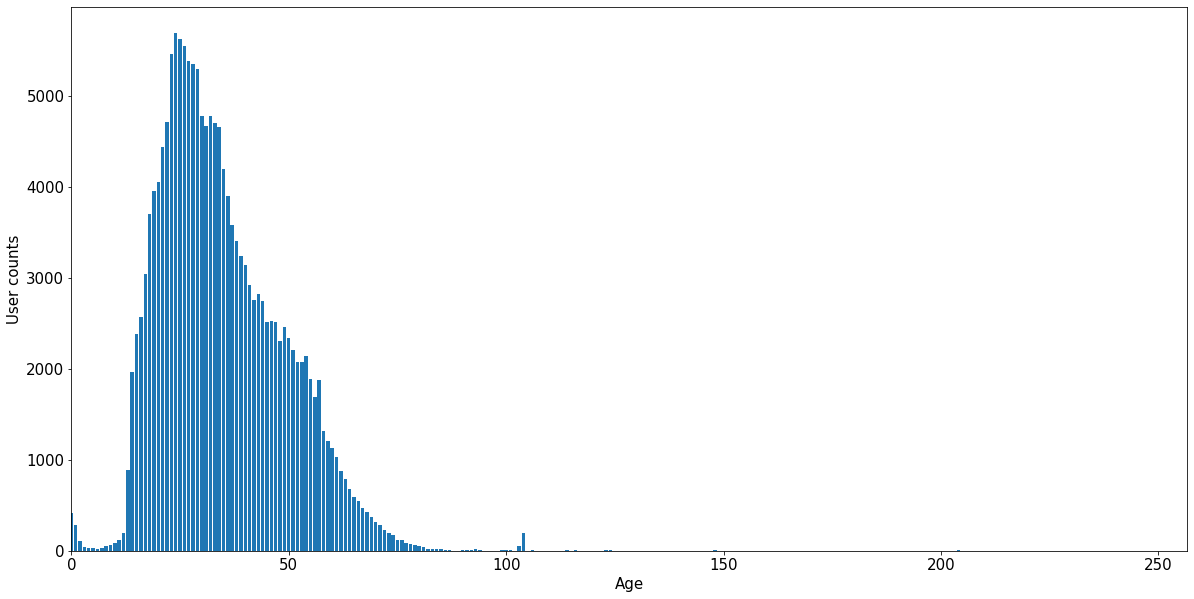

In [ ]:
import matplotlib.pyplot as plt   #visualisasi data
import seaborn as sns

u = users.Age.value_counts().sort_index()
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 15})
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('User counts')
plt.xlim(xmin = 0)
plt.show()

In [ ]:
data.isnull()  #menampilkan missing value dalam bentuk true/false, tru berarti data tersebut missing value

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
278853,True,True,True,True,True,True,True,True,False,True,False,True
278854,True,True,True,True,True,True,True,True,False,True,False,False
278855,True,True,True,True,True,True,True,True,False,True,False,True
278856,True,True,True,True,True,True,True,True,False,True,False,True


In [ ]:
print(data.isnull().sum()) #menampilkan missing value dari tiap-tiap kolom

ISBN                    278858
Book-Title             1428638
Book-Author            1428639
Year-Of-Publication    1428638
Publisher              1428640
Image-URL-S            1428638
Image-URL-M            1428638
Image-URL-L            1428641
User-ID                 271360
Book-Rating             550218
Location               1421140
Age                    1531902
dtype: int64


In [ ]:
data.isnull().sum().sum() #menampilkan mising value dari data

14053950

In [ ]:
data['ISBN'].unique() #menampilkan data dari kolom ISBN

array(['0195153448', '0002005018', '0060973129', ..., '15655122046',
       '05162443314', nan], dtype=object)

In [ ]:
data['Book-Title'].unique() #menampilkan data dari kolom book title

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin",
       nan], dtype=object)

In [ ]:
data['Book-Author'].unique() #menampilkan data dari kolom book author

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [ ]:
data['Year-Of-Publication'].unique() #menampilkan data dari kolom year of publication

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
data['Age'].unique()   #menampilkan data dari kolom Age

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
data['ISBN'] = np.where(data['ISBN']=='N/A','', data['ISBN'])    #cleansing data dengan mengganti missing value menjadi kosong
data['ISBN'] = np.where(data['ISBN']=='nan','', data['ISBN'])
data['ISBN'] = np.where(data['ISBN']=='0','', data['ISBN'])
data['ISBN'] = np.where(data['ISBN']=='NaN','', data['ISBN'])

data['Book-Title'] = np.where(data['Book-Title']=='nan','', data['Book-Title'])
data['Book-Title'] = np.where(data['Book-Title']=='0','', data['Book-Title'])
data['Book-Title'] = np.where(data['Book-Title']=='NaN','', data['Book-Title'])

data['Book-Author'] = np.where(data['Book-Author']=='nan','', data['Book-Author'])
data['Book-Author'] = np.where(data['Book-Author']=='0','', data['Book-Author'])
data['Book-Author'] = np.where(data['Book-Author']=='NaN','', data['Book-Author'])

data['Year-Of-Publication'] = np.where(data['Year-Of-Publication']=='N/A','', data['Year-Of-Publication'])
data['Year-Of-Publication'] = np.where(data['Year-Of-Publication']=='nan','', data['Year-Of-Publication'])
data['Year-Of-Publication'] = np.where(data['Year-Of-Publication']=='0','', data['Year-Of-Publication'])
data['Year-Of-Publication'] = np.where(data['Year-Of-Publication']=='NaN','', data['Year-Of-Publication'])

data['Publisher'] = np.where(data['Publisher']=='nan','', data['Publisher'])
data['Publisher'] = np.where(data['Publisher']=='0','', data['Publisher'])
data['Publisher'] = np.where(data['Publisher']=='NaN','', data['Publisher'])

data['Image-URL-S'] = np.where(data['Image-URL-S']=='nan','', data['Image-URL-S'])
data['Image-URL-S'] = np.where(data['Image-URL-S']=='0','', data['Image-URL-S'])
data['Image-URL-S'] = np.where(data['Image-URL-S']=='NaN','', data['Image-URL-S'])

data['Image-URL-M'] = np.where(data['Image-URL-M']=='nan','', data['Image-URL-M'])
data['Image-URL-M'] = np.where(data['Image-URL-M']=='0','', data['Image-URL-M'])
data['Image-URL-M'] = np.where(data['Image-URL-M']=='NaN','', data['Image-URL-M'])

data['Image-URL-L'] = np.where(data['Image-URL-L']=='nan','', data['Image-URL-L'])
data['Image-URL-L'] = np.where(data['Image-URL-L']=='0','', data['Image-URL-L'])
data['Image-URL-L'] = np.where(data['Image-URL-L']=='NaN','', data['Image-URL-L'])

data['User-ID'] = np.where(data['User-ID']=='nan','', data['User-ID'])
data['User-ID'] = np.where(data['User-ID']=='0','', data['User-ID'])
data['User-ID'] = np.where(data['User-ID']=='NaN','', data['User-ID'])

data['Book-Rating'] = np.where(data['Book-Rating']=='nan','', data['Book-Rating'])
data['Book-Rating'] = np.where(data['Book-Rating']=='0','', data['Book-Rating'])
data['Book-Rating'] = np.where(data['Book-Rating']=='NaN','', data['Book-Rating'])

data['Location'] = np.where(data['Location']=='nan','', data['Location'])
data['Location'] = np.where(data['Location']=='0','', data['Location'])
data['Location'] = np.where(data['Location']=='NaN','', data['Location'])
data['Location'] = np.where(data['Location']=='n/a','', data['Location'])

data['Age'] = np.where(data['Age']=='nan','', data['Age'])
data['Age'] = np.where(data['Age']=='0','', data['Age'])
data['Age'] = np.where(data['Age']=='NaN','', data['Age'])

In [ ]:
data['Location']=data['Location'].replace(np.NaN,'')  #cleansing data dengan mengganti missing value menjadi kosong

In [ ]:
data['Age'].unique()

array(['nan', '18.0', '17.0', '61.0', '26.0', '14.0', '25.0', '19.0',
       '46.0', '55.0', '32.0', '24.0', '20.0', '34.0', '23.0', '51.0',
       '31.0', '21.0', '44.0', '30.0', '57.0', '43.0', '37.0', '41.0',
       '54.0', '42.0', '50.0', '39.0', '53.0', '47.0', '36.0', '28.0',
       '35.0', '13.0', '58.0', '49.0', '38.0', '45.0', '62.0', '63.0',
       '27.0', '33.0', '29.0', '66.0', '40.0', '15.0', '60.0', '0.0',
       '79.0', '22.0', '16.0', '65.0', '59.0', '48.0', '72.0', '56.0',
       '67.0', '1.0', '80.0', '52.0', '69.0', '71.0', '73.0', '78.0',
       '9.0', '64.0', '103.0', '104.0', '12.0', '74.0', '75.0', '231.0',
       '3.0', '76.0', '83.0', '68.0', '119.0', '11.0', '77.0', '2.0',
       '70.0', '93.0', '8.0', '7.0', '4.0', '81.0', '114.0', '230.0',
       '239.0', '10.0', '5.0', '148.0', '151.0', '6.0', '101.0', '201.0',
       '96.0', '84.0', '82.0', '90.0', '123.0', '244.0', '133.0', '91.0',
       '128.0', '94.0', '85.0', '141.0', '110.0', '97.0', '219.0', '86.0',

In [ ]:
data['Location'].unique()

array(['', 'nyc, new york, usa', 'stockton, california, usa', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,nan,nan,,nan
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,nan,nan,,nan
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,nan,nan,,nan
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,nan,nan,,nan
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,nan,nan,,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
278853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278854.0,nan,"portland, oregon, usa",nan
278854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278855.0,nan,"tacoma, washington, united kingdom",50.0
278855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278856.0,nan,"brampton, ontario, canada",nan
278856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278857.0,nan,"knoxville, tennessee, usa",nan


In [ ]:
data1 = data.dropna()
data1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,nan,nan,,nan
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,nan,nan,,nan
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,nan,nan,,nan
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,nan,nan,,nan
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,nan,nan,,nan


In [ ]:
data1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,nan,nan,,nan
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,nan,nan,,nan
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,nan,nan,,nan
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,nan,nan,,nan
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,nan,nan,,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,nan,nan,,nan
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,nan,nan,,nan
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,nan,nan,,nan
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,nan,nan,,nan


In [ ]:
data1.isnull().any().sum()

0

## Popularity Based Recommender System

In [ ]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [ ]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommender System

In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [ ]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [ ]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [ ]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [ ]:
pt.index[700]

'Wuthering Heights'

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))